In [1]:
import sys

print(sys.version)

3.5.2 (default, Aug 18 2017, 17:48:00) 
[GCC 5.4.0 20160609]


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

%matplotlib inline


## Fetch the data and load it in pandas

In [3]:
from urllib.request import urlretrieve

In [4]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases"
       "/adult/adult.data")
local_filename = os.path.basename(url)
if not os.path.exists(local_filename):
    print("Downloading Adult Census datasets from UCI")
    urlretrieve(url, local_filename)

In [5]:
names = ("age, workclass, fnlwgt, education, education-num, "
         "marital-status, occupation, relationship, race, sex, "
         "capital-gain, capital-loss, hours-per-week, "
         "native-country, income").split(', ')    
data = pd.read_csv(local_filename, names=names)

In [6]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
# Strip spaces
df_obj = data.select_dtypes(['object'])

data[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())


In [8]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
data.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

In [10]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
data.groupby('occupation').size()

occupation
?                    1843
Adm-clerical         3770
Armed-Forces            9
Craft-repair         4099
Exec-managerial      4066
Farming-fishing       994
Handlers-cleaners    1370
Machine-op-inspct    2002
Other-service        3295
Priv-house-serv       149
Prof-specialty       4140
Protective-serv       649
Sales                3650
Tech-support          928
Transport-moving     1597
dtype: int64

In [12]:
data.groupby('native-country').size()

native-country
?                               583
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua    

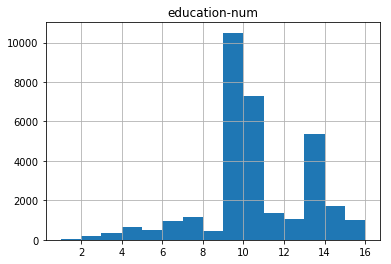

In [13]:
data.hist(column='education-num', bins=15);

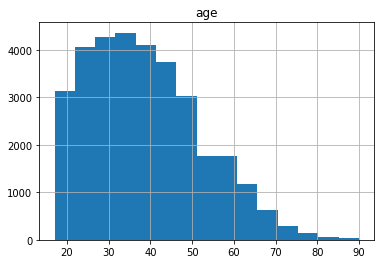

In [14]:
data.hist(column='age', bins=15);

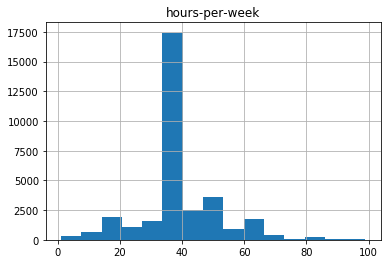

In [15]:
data.hist('hours-per-week', bins=15);

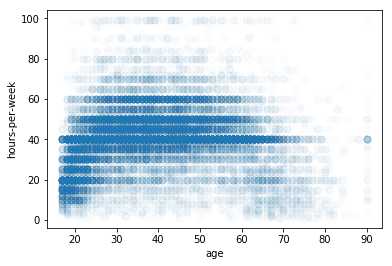

In [16]:
data.plot(x='age', y='hours-per-week', kind='scatter',
          alpha=0.02, s=50);

In [17]:
data.groupby('income')['income'].count()

income
<=50K    24720
>50K      7841
Name: income, dtype: int64

In [18]:
np.mean(data['income'] == '>50K')

0.24080955744602439

In [19]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [20]:
data = data.dropna()

In [21]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [22]:
target_names = data['income'].unique()
target_names

array(['<=50K', '>50K'], dtype=object)

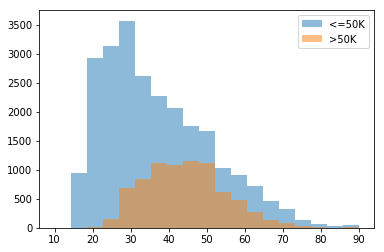

In [23]:
low_income = data[data['income'] == '<=50K']
high_income = data[data['income'] == '>50K']

bins = np.linspace(10, 90, 20)
plt.hist(low_income['age'].values, bins=bins, alpha=0.5, label='<=50K')
plt.hist(high_income['age'].values, bins=bins, alpha=0.5, label='>50K')
plt.legend(loc='best');

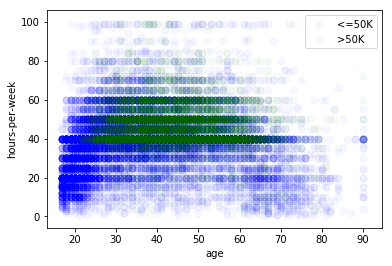

In [24]:
plt.scatter(low_income['age'], low_income['hours-per-week'],
            alpha=0.03, s=50, c='b', label='<=50K');
plt.scatter(high_income['age'], high_income['hours-per-week'],
            alpha=0.03, s=50, c='g', label='>50K');
plt.legend()
plt.xlabel('age'); plt.ylabel('hours-per-week');

## Building predictive models

In [25]:
target = data['income']
features_data = data.drop('income', axis=1)
numeric_features = [c for c in features_data if features_data[c].dtype.kind in ('i', 'f')]

categorical_data = features_data.drop(numeric_features, 1)
categories = {}
for c in list(categorical_data):
    categorical_data[c] = categorical_data[c].apply(lambda x: x.strip())
    idx = pd.factorize(categorical_data[c])[1]
    categories[c] = {v: k for k,v in enumerate(idx)}


In [26]:
def prepare(features_data):
    
    numeric_data = features_data[numeric_features]
    categorical_data = features_data.drop(numeric_features, 1)
    categorical_data_encoded = categorical_data.replace(categories)
    
    features = pd.concat([numeric_data, categorical_data_encoded], axis=1)
    return features.values.astype(np.float32)


In [27]:
X = prepare(features_data)

In [28]:
y = (target.values == '>50K').astype(np.int32)

In [29]:
X.shape

(32561, 14)

In [30]:
y.shape

(32561,)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(max_depth=8)

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
print("ROC AUC Decision Tree: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

ROC AUC Decision Tree: 0.8969 +/-0.0036


## Model error analysis

In [33]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, X, y, ylim=(0, 1.1), cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),
                        scoring=None):
    plt.title("Learning curves for %s" % type(estimator).__name__)
    plt.ylim(*ylim); plt.grid()
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    print("Best validation score: {:.4f}".format(validation_scores_mean[-1]))

Best validation score: 0.7492


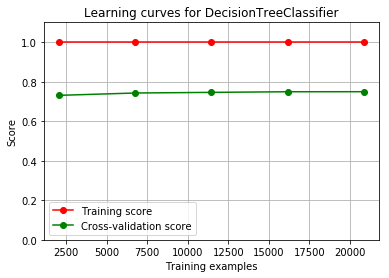

In [34]:
clf = DecisionTreeClassifier(max_depth=None)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

Best validation score: 0.8578


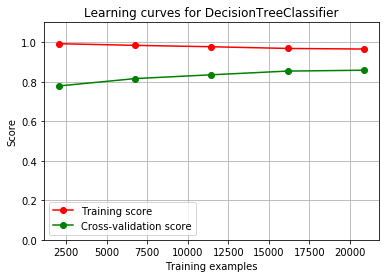

In [35]:
clf = DecisionTreeClassifier(max_depth=15)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

Best validation score: 0.8972


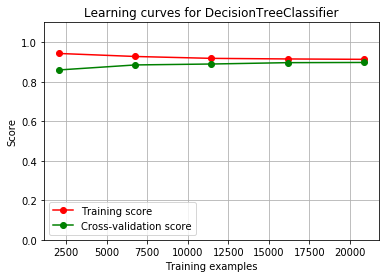

In [36]:
clf = DecisionTreeClassifier(max_depth=8)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

Best validation score: 0.8636


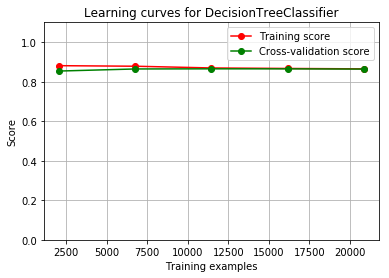

In [37]:
clf = DecisionTreeClassifier(max_depth=4)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

In [38]:
from sklearn.model_selection import validation_curve


def plot_validation_curve(estimator, X, y, param_name, param_range,
                          ylim=(0, 1.1), cv=5, n_jobs=-1, scoring=None):
    estimator_name = type(estimator).__name__
    plt.title("Validation curves for %s on %s"
              % (param_name, estimator_name))
    plt.ylim(*ylim); plt.grid()
    plt.xlim(min(param_range), max(param_range))
    plt.xlabel(param_name)
    plt.ylabel("Score")

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name, param_range,
        cv=cv, n_jobs=n_jobs, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.semilogx(param_range, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.semilogx(param_range, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    print("Best test score: {:.4f}".format(test_scores_mean[-1]))

Best test score: 0.7524


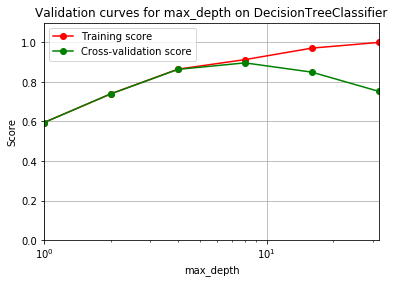

In [39]:
clf = DecisionTreeClassifier(max_depth=8)
param_name = 'max_depth'
param_range = [1, 2, 4, 8, 16, 32]

plot_validation_curve(clf, X_train, y_train,
                      param_name, param_range, scoring='roc_auc')

In [41]:
import drun.io

clf = DecisionTreeClassifier(max_depth=8)
clf.fit(X=X_train, y=y_train)

drun.io.export('/drun/income.model', 
               lambda x : {'result': int(clf.predict(x)[0]) },
               prepare_func=lambda x : prepare(x),
               param_types=dict(data.dtypes),
               version='1.0')

In [42]:
%ls /drun

income.model
